In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pathlib
import random
import IPython.display as display

In [2]:
tf.__version__

'2.3.0'

In [3]:
data_dir = '../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/'

In [4]:
data_root = pathlib.Path(data_dir)

In [5]:
data_root 

WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset')

In [6]:
for item in data_root.iterdir():
    print(item)

..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\black_jeans
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\black_shoes
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\blue_dress
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\blue_jeans
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\blue_shirt
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\red_dress
..\..\Tensorflow_course\dataset\all_dataset\dataset\multi-output-classification\dataset\red_shirt


In [7]:
all_image_paths = list(data_root.glob('*/*'))

In [8]:
image_count = len(all_image_paths)
image_count

2525

In [9]:
all_image_paths[:3]

[WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/black_jeans/00000000.jpg'),
 WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/black_jeans/00000001.jpeg'),
 WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/black_jeans/00000002.jpeg')]

In [10]:
all_image_paths[-3:]

[WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/red_shirt/00000383.jpg'),
 WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/red_shirt/00000386.jpeg'),
 WindowsPath('../../Tensorflow_course/dataset/all_dataset/dataset/multi-output-classification/dataset/red_shirt/00000388.jpg')]

In [11]:
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

In [12]:
all_image_paths[:5]

['..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\blue_dress\\00000174.jpg',
 '..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\blue_jeans\\00000240.jpg',
 '..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\blue_shirt\\00000159.jpg',
 '..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\blue_dress\\00000222.jpeg',
 '..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\red_shirt\\00000071.jpg']

In [13]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['black_jeans',
 'black_shoes',
 'blue_dress',
 'blue_jeans',
 'blue_shirt',
 'red_dress',
 'red_shirt']

In [14]:
color_label_names = set(name.split('_')[0] for name in label_names)
color_label_names

{'black', 'blue', 'red'}

In [15]:
item_label_names = set(name.split('_')[1] for name in label_names)
item_label_names

{'dress', 'jeans', 'shirt', 'shoes'}

In [16]:
color_label_to_index = dict((name, index) for index,name in enumerate(color_label_names))
color_label_to_index

{'red': 0, 'black': 1, 'blue': 2}

In [17]:
item_label_to_index = dict((name, index) for index,name in enumerate(item_label_names))
item_label_to_index

{'dress': 0, 'shirt': 1, 'shoes': 2, 'jeans': 3}

In [18]:
all_image_labels = [pathlib.Path(path).parent.name for path in all_image_paths]
all_image_labels[:5]

['blue_dress', 'blue_jeans', 'blue_shirt', 'blue_dress', 'red_shirt']

In [19]:
color_labels = [color_label_to_index[label.split('_')[0]] for label in all_image_labels]
color_labels[:5]

[2, 2, 2, 2, 0]

In [20]:
item_labels = [item_label_to_index[label.split('_')[1]] for label in all_image_labels]
item_labels[:5]

[0, 3, 1, 0, 1]

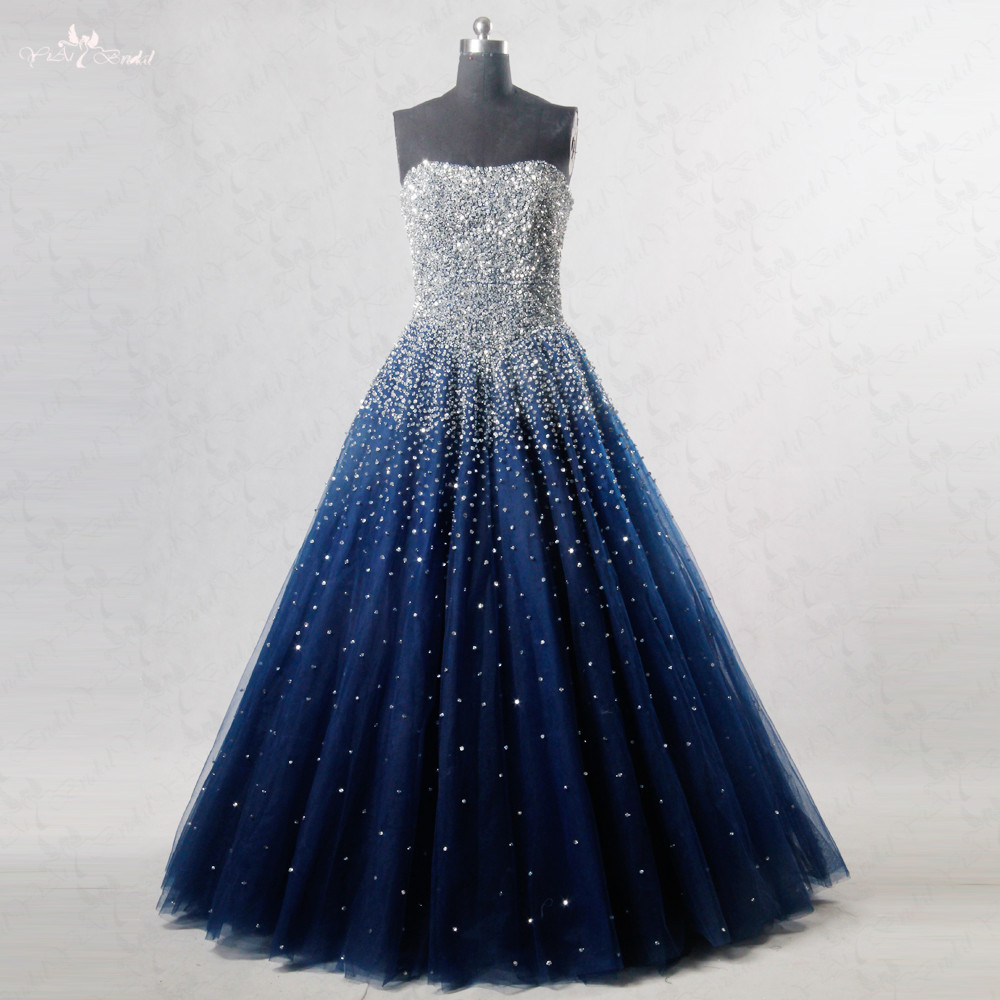

blue_dress



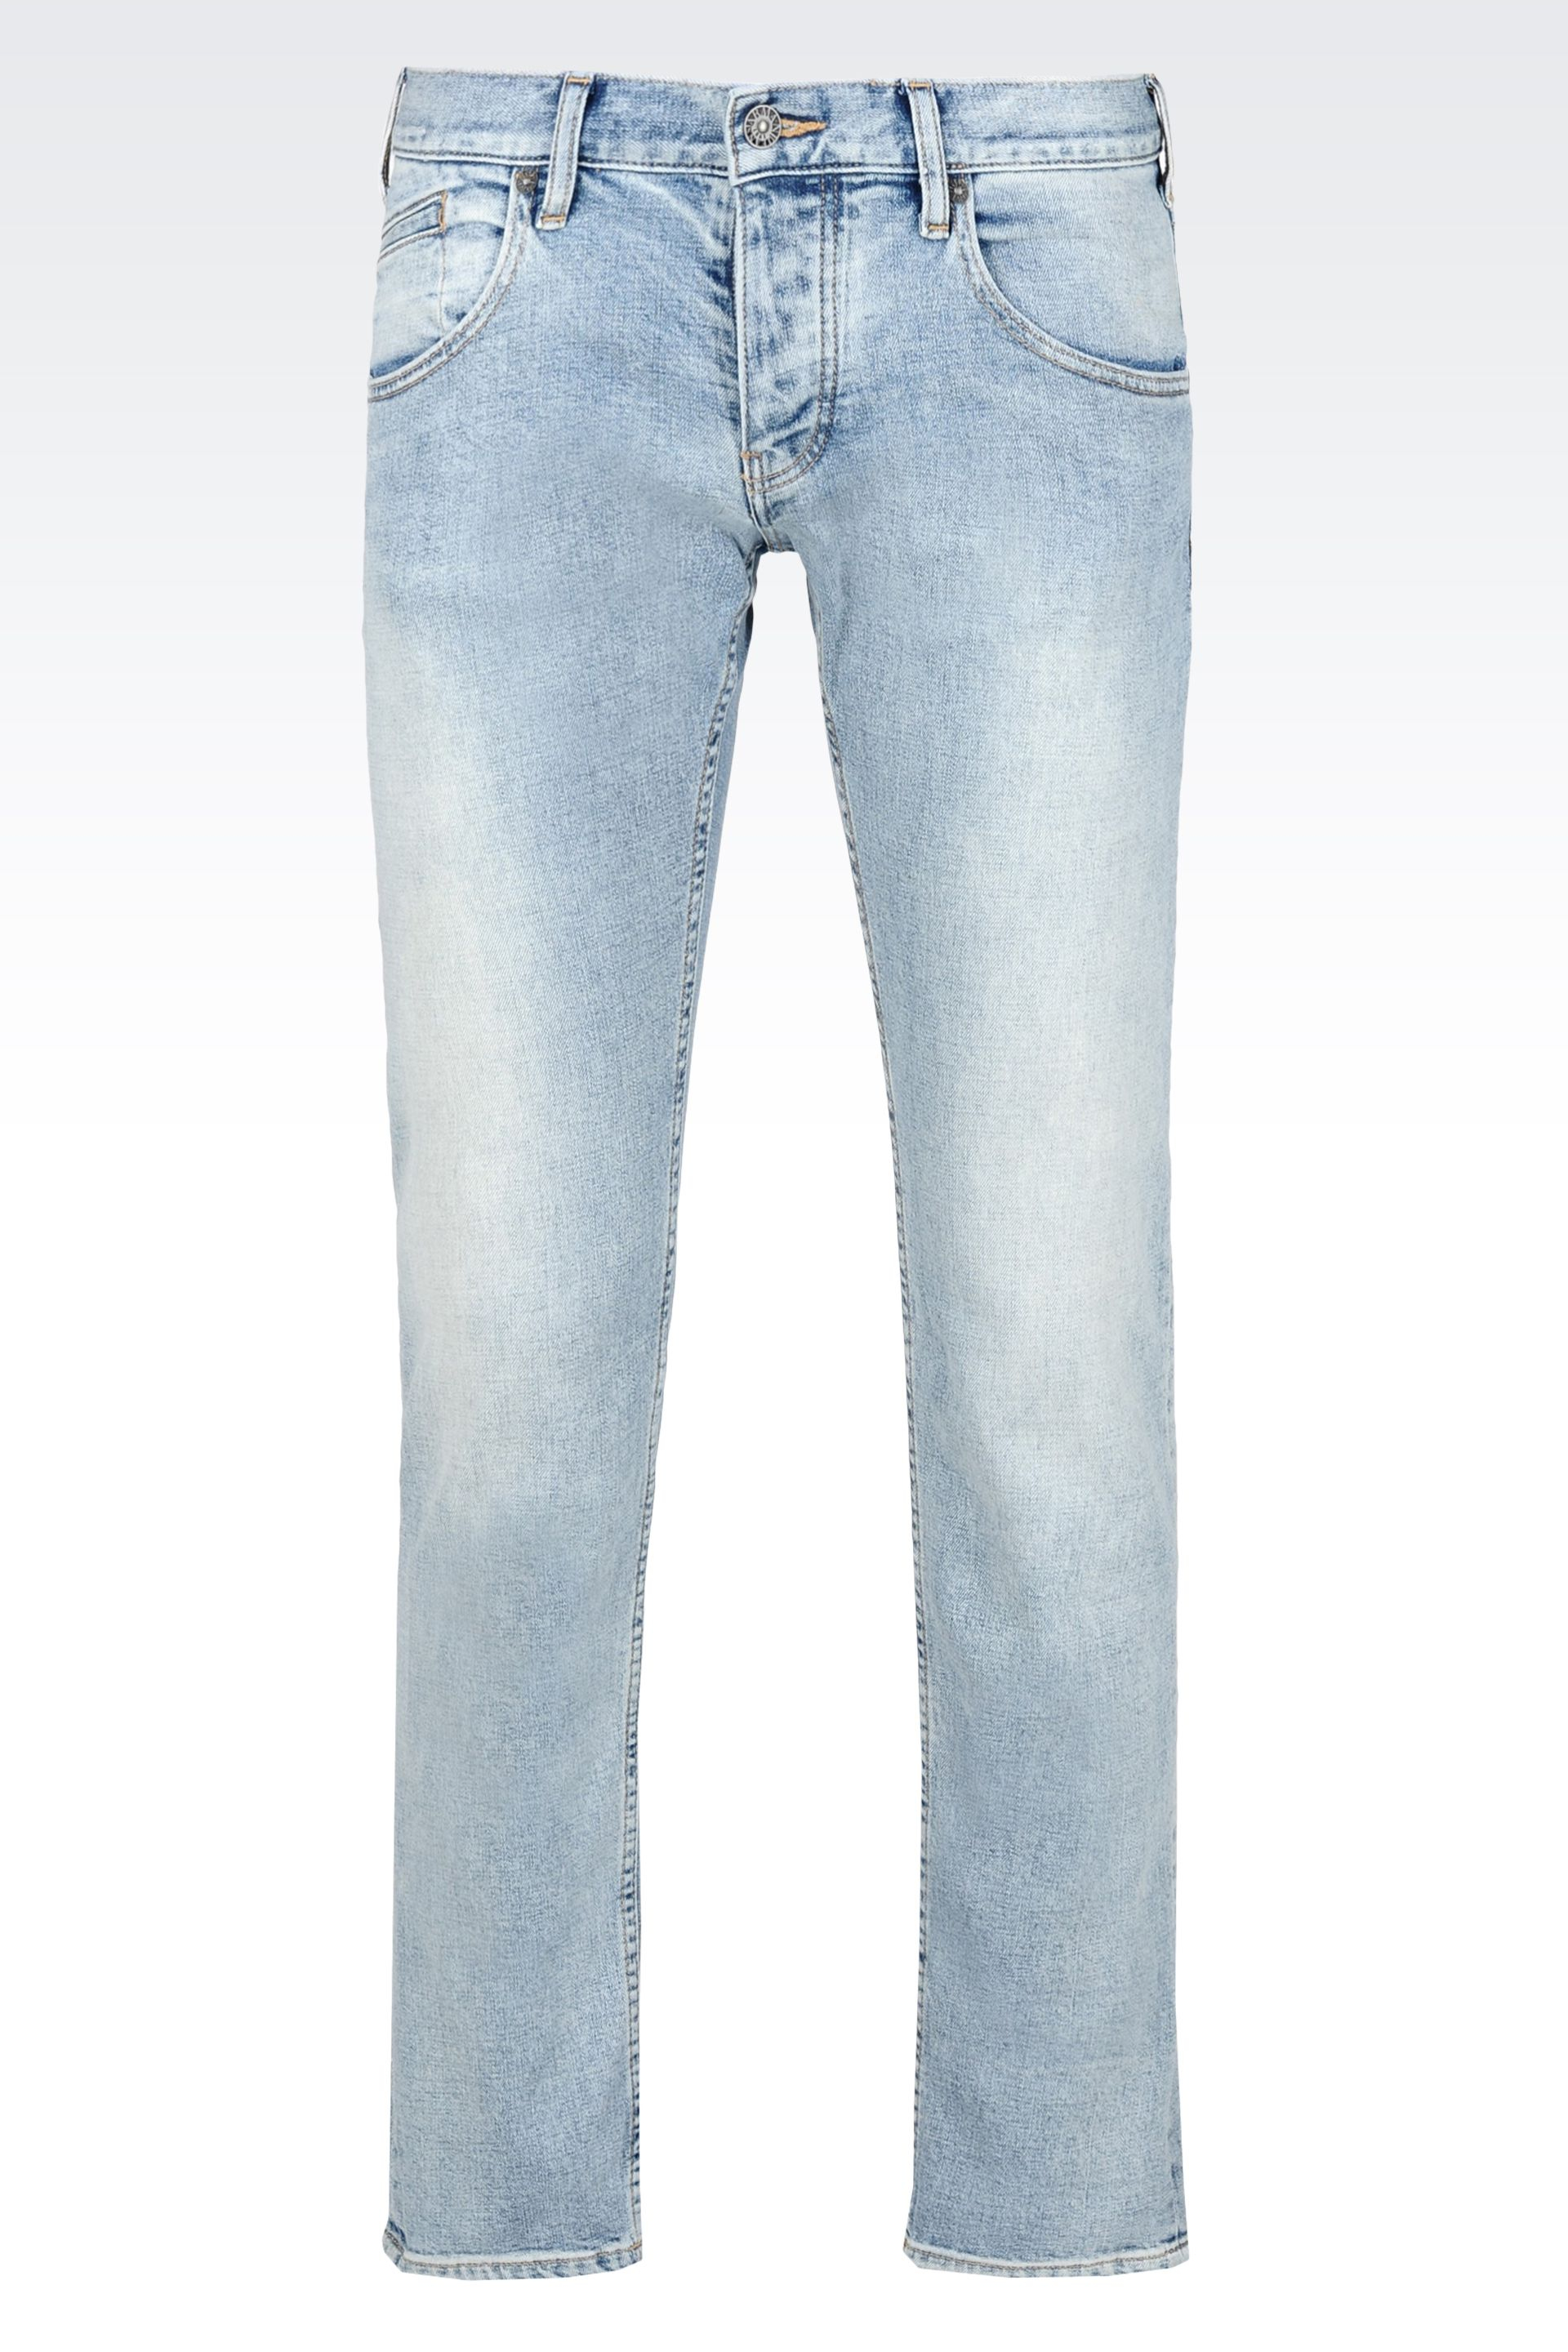

blue_jeans



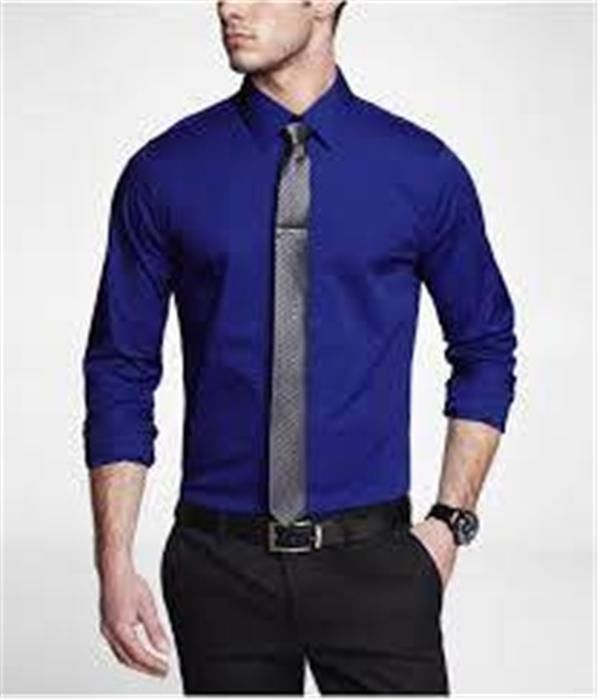

blue_shirt



In [21]:
for n in range(3):
    image_index = random.choice(range(len(all_image_paths)))
    display.display(display.Image(all_image_paths[image_index], width=100, height=100))
    print(all_image_labels[image_index])
    print()

加载和格式化图像数据

In [22]:
img_path = all_image_paths[0]
img_path

'..\\..\\Tensorflow_course\\dataset\\all_dataset\\dataset\\multi-output-classification\\dataset\\blue_dress\\00000174.jpg'

In [23]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [24]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(900, 900, 3)
<dtype: 'uint8'>


In [25]:
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = tf.image.resize(img_tensor, [224, 224])
img_final = img_tensor/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(224, 224, 3)
0.0024040344
0.9738436


In [26]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32)
    image = image/255.0   # 归一化到[0,1]
    image = 2*image-1     # 归一化到[-1,1]
    return image

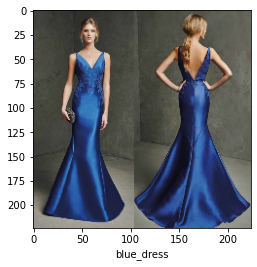

In [27]:
img_path = all_image_paths[0]
img_label = all_image_labels[0]

plt.imshow((load_and_preprocess_image(img_path) + 1)/2)
plt.grid(False)
plt.xlabel(img_label)
print()

In [28]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [30]:
label_ds = tf.data.Dataset.from_tensor_slices((color_labels, item_labels))

In [31]:
for ele in label_ds.take(3):
    print(ele[0].numpy(), ele[1].numpy())

2 0
2 3
2 1


In [32]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [33]:
image_label_ds

<ZipDataset shapes: ((224, 224, 3), ((), ())), types: (tf.float32, (tf.int32, tf.int32))>

In [34]:
test_count = int(image_count*0.2)
train_count = image_count - test_count

In [35]:
train_data = image_label_ds.skip(test_count)

test_data = image_label_ds.take(test_count)

In [36]:
BATCH_SIZE = 32

In [37]:
train_data = train_data.shuffle(buffer_size=train_count).repeat()
train_data = train_data.batch(BATCH_SIZE)
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
train_data

<PrefetchDataset shapes: ((None, 224, 224, 3), ((None,), (None,))), types: (tf.float32, (tf.int32, tf.int32))>

In [38]:
test_data = test_data.batch(BATCH_SIZE)
test_data

<BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,))), types: (tf.float32, (tf.int32, tf.int32))>